# Reconhecimento de Dígitos em Imagens (0 a 9)
Objetivo:
Treinar e avaliar um modelo de rede neural convolucional (CNN) para reconhecer dígitos de 0 a 9 a partir de imagens.

## 1. Importação de Bibliotecas
### Descrição:
- tensorflow.keras e keras.layers: Para construir e treinar a rede neural convolucional.
- sklearn.metrics: Para avaliar o desempenho do modelo.
- pandas e numpy: Para manipulação de dados.
- matplotlib.pyplot: Para visualização dos resultados.


In [3]:
from tensorflow.keras import layers, models
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten,Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Carregamento do Dataset

In [5]:
df_train = pd.read_csv('train.csv')
df_train.head(10)
df_test = pd.read_csv('test.csv')
x_train = np.asarray(df_train.iloc[:,1:]).reshape(df_train.shape[0],28,28,1) #imagens
y_train = df_train.iloc[:,0] #labels 
x_test = np.asarray(df_test).reshape(df_test.shape[0],28,28,1) #imagens

## 3. Normalização dos Dados

In [6]:
x_train = x_train.astype('float32') / 255.0 #(255 é o valor máximo do byte) 
x_test = x_test.astype('float32') / 255.0 

## 4. Definição da Rede Neural Convolucional

In [7]:
modelo = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    Flatten(),
    Dense(64,activation='relu'),
    layers.Dropout(0.3),
    Dense(10,activation='softmax')
    ])
modelo.summary()
modelo.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\Gabriel Prisco\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Treinamento do Modelo

In [8]:
Result= modelo.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.3)

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.6849 - loss: 0.9506 - val_accuracy: 0.9617 - val_loss: 0.1243
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9409 - loss: 0.1957 - val_accuracy: 0.9738 - val_loss: 0.0863
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9601 - loss: 0.1306 - val_accuracy: 0.9794 - val_loss: 0.0647
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9691 - loss: 0.0990 - val_accuracy: 0.9842 - val_loss: 0.0510
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9724 - loss: 0.0881 - val_accuracy: 0.9852 - val_loss: 0.0482
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9764 - loss: 0.0743 - val_accuracy: 0.9862 - val_loss: 0.0463
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9788 - loss: 0.0668 - val_accuracy: 0.9860 - val_loss: 0.0447
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9810 - loss: 0.0626 - val_acc

## 6. Avaliação do Modelo

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9919 - loss: 0.0236
99.07 %
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


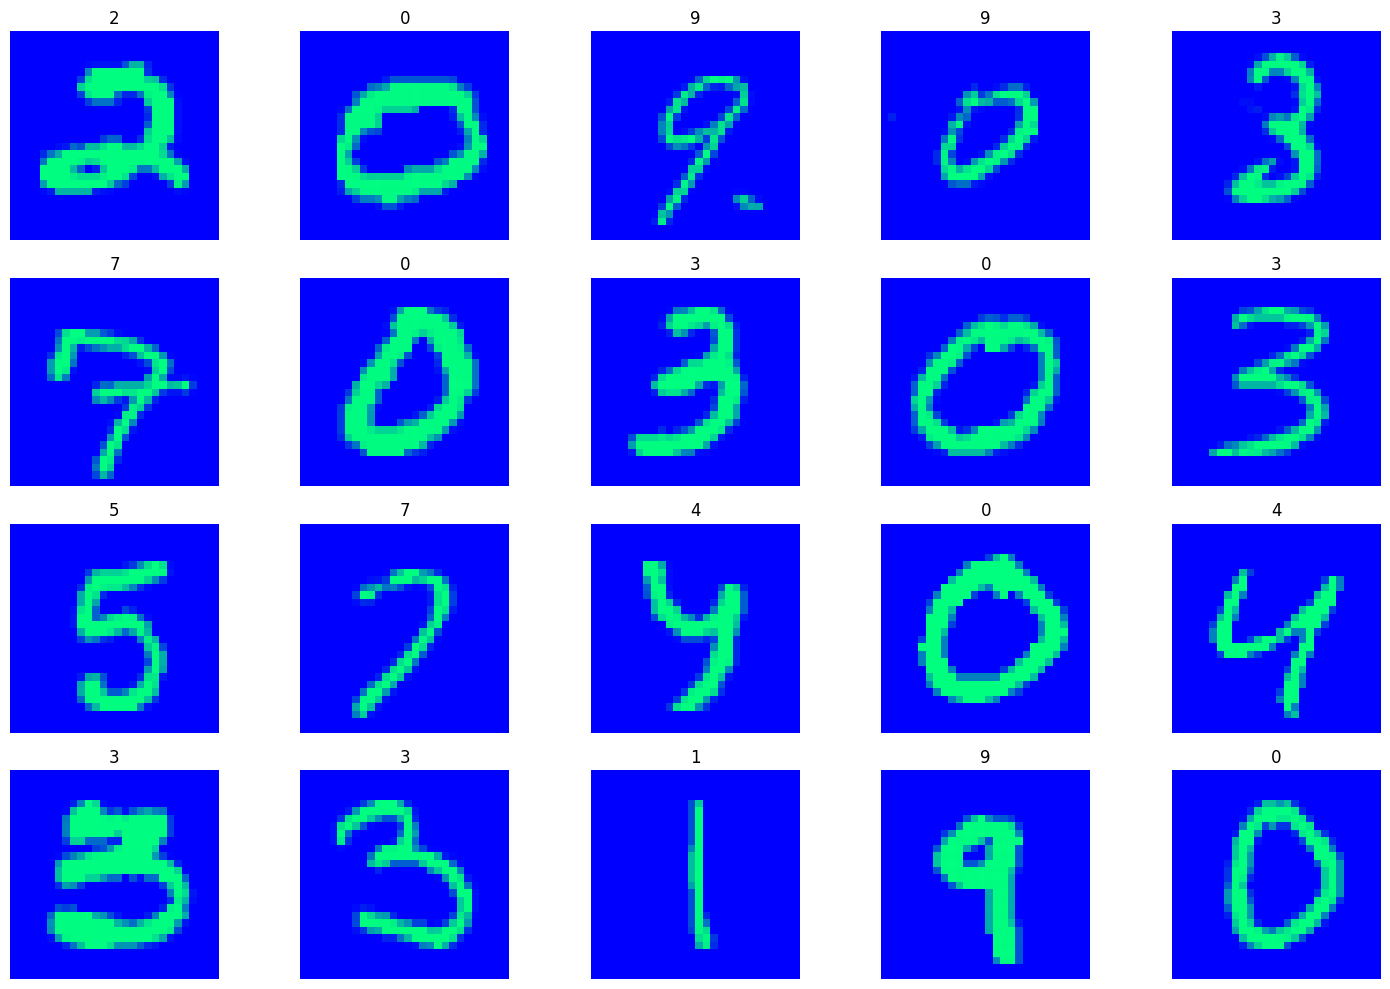

In [9]:
score = modelo.evaluate(x_train,y_train, verbose=1)

print(round(score[1]*100,2),'%')
predictions = modelo.predict(x_test)  
predicted_classes = np.argmax(predictions, axis=1)
num_images = 20  
rows = 4  
cols = 5  
plt.figure(figsize=(15, 10))  # Tamanho da figura ajustado para melhorar a visualização  
for i in range(num_images):  
    plt.subplot(rows, cols, i + 1)  
    plt.imshow(x_test[i].reshape(28, 28), cmap='winter')  
    plt.title(f'{predicted_classes[i]}')  
    plt.axis('off')  

plt.tight_layout()  
plt.savefig('Digit Recognition')
plt.show()  



